<font color="red"><b>MACHINE LEARNING<b></font> 

<b>2-MULTIPLE LINEAR REGRESSION<b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('2-multiplegradesdataset.csv')

In [4]:
df.head()

Study Hours  Sleep Hours  Attendance Rate  Social Media Hours  Exam Score
0          4.7          7.3             82.9                 3.3        80.7
1          3.8          6.6             87.9                 3.3        76.0
2          5.0          6.3             88.3                 2.3        89.1
3          6.3          7.6             86.0                 3.2        95.9
4          3.6          8.0             89.2                 3.3        70.5

In [5]:
df.describe()

Study Hours  Sleep Hours  Attendance Rate  Social Media Hours  \
count     50.00000    50.000000        50.000000            50.00000   
mean       3.66800     7.022000        89.736000             3.09000   
std        1.40123     0.874419         4.924813             0.89699   
min        1.10000     4.400000        80.400000             1.50000   
25%        2.67500     6.500000        85.625000             2.22500   
50%        3.60000     7.050000        90.100000             3.20000   
75%        4.50000     7.575000        92.550000             3.57500   
max        6.80000     8.600000       100.000000             5.70000   

       Exam Score  
count    50.00000  
mean     76.07000  
std      11.70915  
min      56.90000  
25%      68.07500  
50%      73.55000  
75%      84.17500  
max     100.00000

In [6]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

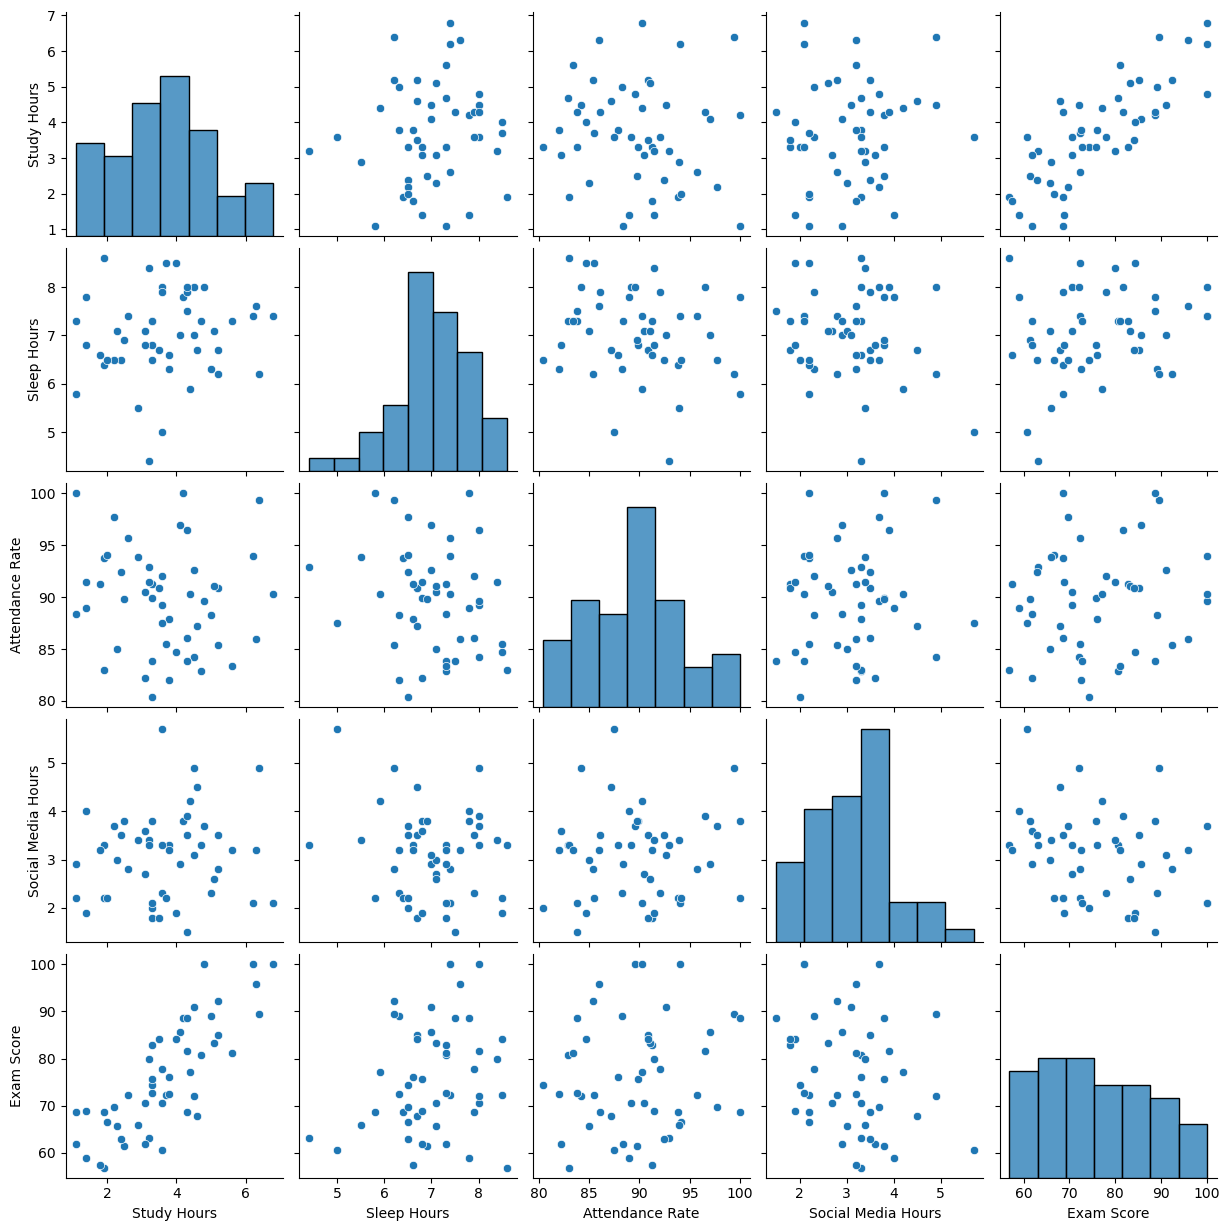

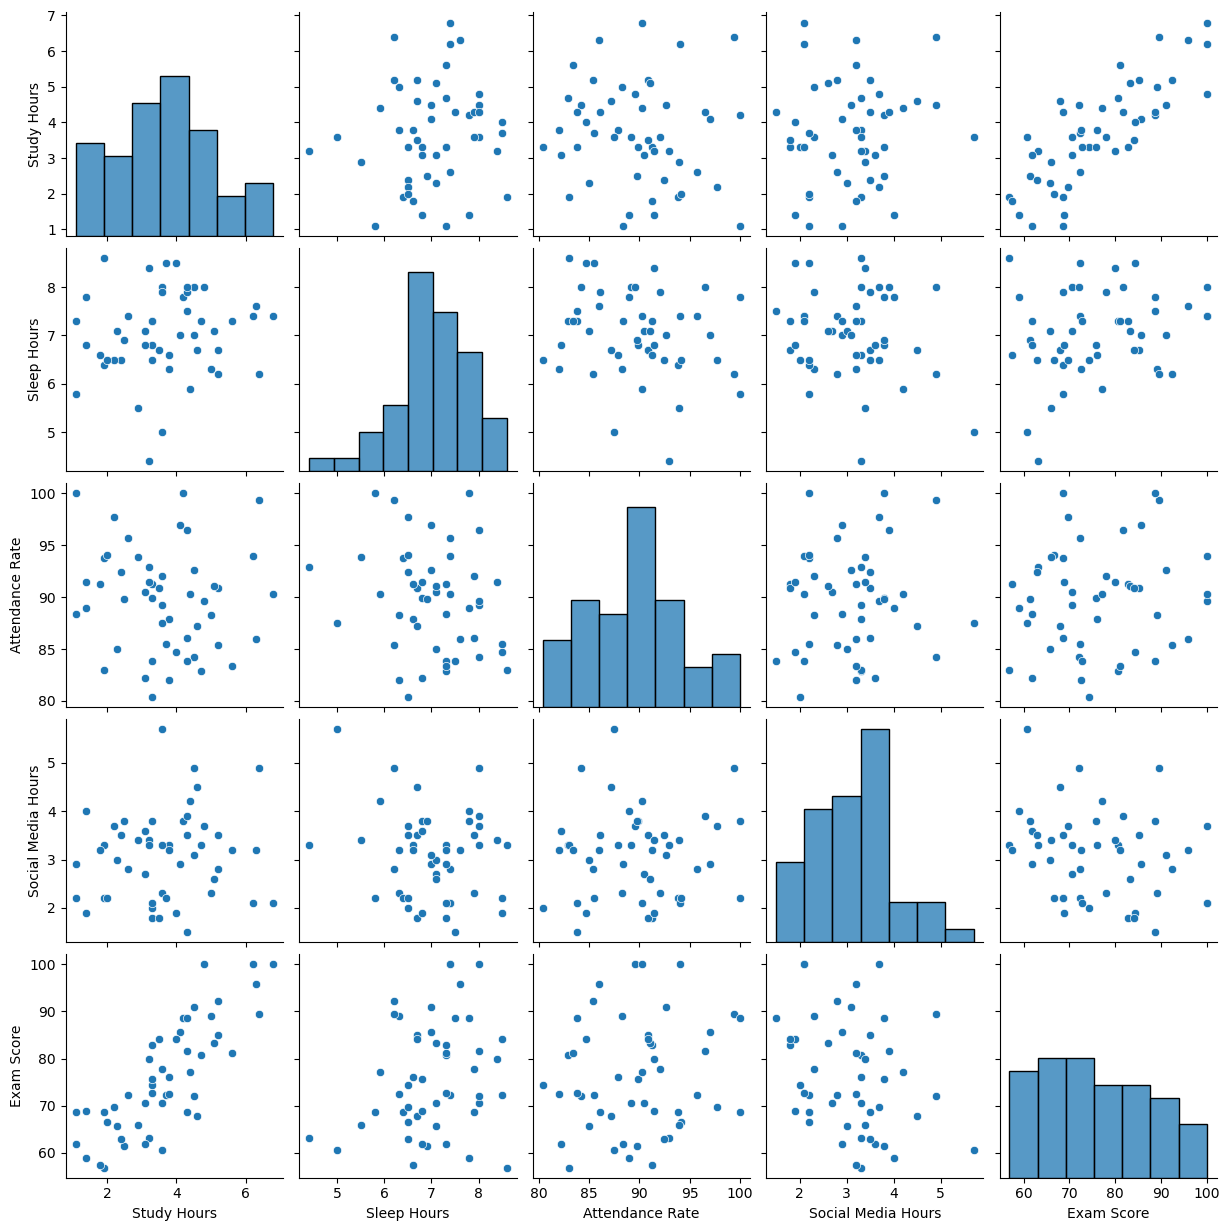

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.corr()

Study Hours  Sleep Hours  Attendance Rate  \
Study Hours            1.000000     0.114015        -0.112860   
Sleep Hours            0.114015     1.000000        -0.222024   
Attendance Rate       -0.112860    -0.222024         1.000000   
Social Media Hours     0.115023    -0.177166         0.068272   
Exam Score             0.804266     0.227694         0.123791   

                    Social Media Hours  Exam Score  
Study Hours                   0.115023    0.804266  
Sleep Hours                  -0.177166    0.227694  
Attendance Rate               0.068272    0.123791  
Social Media Hours            1.000000   -0.248743  
Exam Score                   -0.248743    1.000000

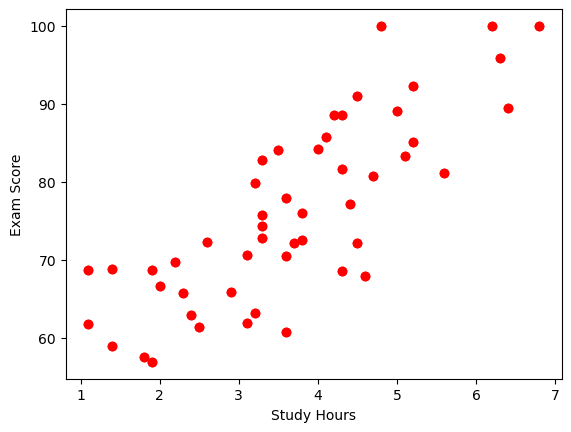

In [11]:
plt.scatter(df['Study Hours'],df['Exam Score'],color="r")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

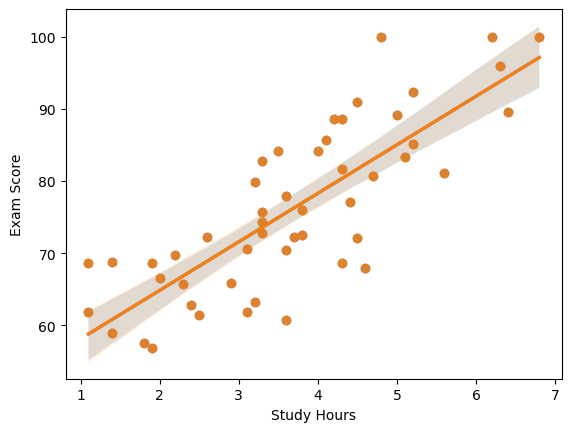

In [13]:
sns.regplot(x=df["Study Hours"],y=df["Exam Score"])
plt.show()

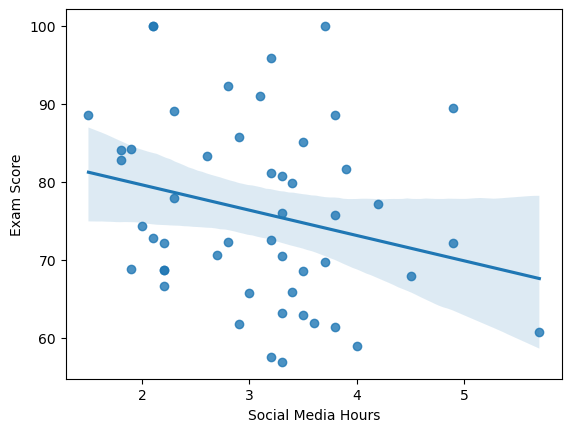

In [14]:
sns.regplot(x=df["Social Media Hours"],y=df["Exam Score"])
plt.show()

In [15]:
df.tail()

Study Hours  Sleep Hours  Attendance Rate  Social Media Hours  Exam Score
45          2.9          5.5             93.9                 3.4        65.9
46          3.3          7.3             83.8                 2.1        72.8
47          5.6          7.3             83.4                 3.2        81.1
48          4.5          7.0             92.6                 3.1        91.0
49          1.4          6.8             91.5                 1.9        68.8

In [28]:
#ındependent dependent features
X=df.iloc[:,:-1] #son haric hepsini al
y=df.iloc[:,-1]
#X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
#y = df["Exam Score"]

In [29]:
X.head()

Study Hours  Sleep Hours  Attendance Rate  Social Media Hours
0          4.7          7.3             82.9                 3.3
1          3.8          6.6             87.9                 3.3
2          5.0          6.3             88.3                 2.3
3          6.3          7.6             86.0                 3.2
4          3.6          8.0             89.2                 3.3

In [30]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [35]:
X_test[0]

array([-1.29053937, -0.49984673,  1.62356013,  0.67593203])

In [36]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [37]:
new_student = [[5, 7, 90, 2]]  # 5 study hours, 7 sleep hours, %90 attendance, 2 social media hours


In [38]:
new_student_scaled = scaler.transform(new_student)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
regression.predict(new_student_scaled)

array([90.88471349])

In [40]:
students = [
    [6, 8, 95, 5],
    [3, 6, 85, 4],
    [4, 7, 80, 3]
]

In [42]:
predicted_scores = regression.predict(scaler.transform(students))
print(predicted_scores)

[90.37189122 62.43586785 72.73292556]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
#prediction
y_pred=regression.predict(X_test)

In [46]:
y_pred


array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [48]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("mse:",mse)
print("mae:",mae)

mse: 14.600589378986255
mae: 3.277026485962786


In [49]:
score=r2_score(y_test,y_pred)
score

0.915670734577271

In [51]:
#adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8735061018659065


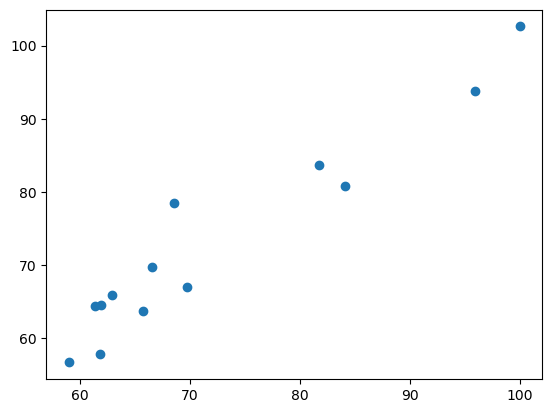

In [52]:
plt.scatter(y_test,y_pred)
plt.show()

In [54]:
residuals=y_test-y_pred

In [55]:
print(residuals)

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64


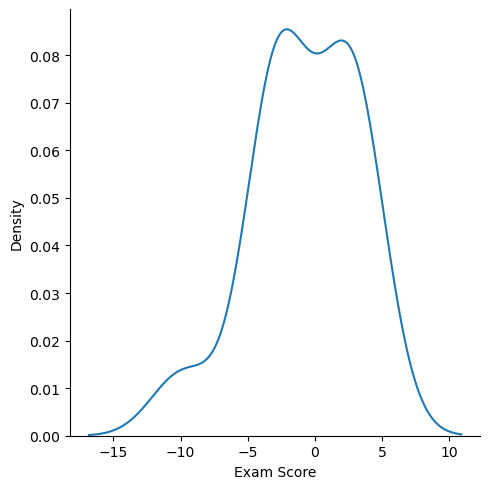

In [58]:
sns.displot(residuals,kind="kde")
plt.show()

In [59]:
regression.intercept_

77.41081081081082

In [61]:
regression.coef_

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])

In [62]:
X.head()

Study Hours  Sleep Hours  Attendance Rate  Social Media Hours
0          4.7          7.3             82.9                 3.3
1          3.8          6.6             87.9                 3.3
2          5.0          6.3             88.3                 2.3
3          6.3          7.6             86.0                 3.2
4          3.6          8.0             89.2                 3.3